In [57]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import nbformat
import numpy as np
import os
import warnings
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.limits'] = (-5, 5)

In [58]:
data = pd.read_csv('house_price_india.csv')

In [59]:
data.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.00,0,4,5,...,1921,0,122003,52.86,-114.56,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.50,0,0,5,...,1909,0,122004,52.89,-114.47,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.50,0,0,3,...,1939,0,122004,52.89,-114.47,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.00,0,0,3,...,2001,0,122005,52.95,-114.32,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.50,0,0,4,...,1929,0,122006,52.90,-114.48,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.00,0,0,4,...,1951,0,122007,52.91,-114.59,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.00,0,2,3,...,2006,0,122008,52.76,-114.05,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.00,0,0,5,...,1923,0,122006,52.93,-114.48,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.00,0,2,4,...,1955,0,122009,52.80,-114.60,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.50,0,0,5,...,1920,0,122010,52.91,-114.39,2320,10814,2,53,698000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [61]:
data.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,...,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00
mean,6762820830.53,42604.54,3.38,2.13,2098.26,15093.28,1.50,0.01,0.23,3.43,...,1970.93,90.92,122033.06,52.79,-114.40,1996.70,12753.50,2.01,64.95,538932.22
std,6237.57,67.35,0.94,0.77,928.28,37919.62,0.54,0.09,0.77,0.66,...,29.49,416.22,19.08,0.14,0.14,691.09,26058.41,0.82,8.94,367532.38
min,6762810020.00,42491.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,122003.00,52.39,-114.71,460.00,651.00,1.00,50.00,78000.00
25%,6762815404.75,42546.00,3.00,1.75,1440.00,5010.75,1.00,0.00,0.00,3.00,...,1951.00,0.00,122017.00,52.71,-114.52,1490.00,5097.75,1.00,57.00,320000.00
50%,6762820822.50,42600.00,3.00,2.25,1930.00,7620.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,122032.00,52.81,-114.42,1850.00,7620.00,2.00,65.00,450000.00
75%,6762826251.25,42662.00,4.00,2.50,2570.00,10800.00,2.00,0.00,0.00,4.00,...,1997.00,0.00,122048.00,52.91,-114.31,2380.00,10125.00,3.00,73.00,645000.00
max,6762831616.00,42734.00,33.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,122072.00,53.01,-113.50,6110.00,560617.00,3.00,80.00,7700000.00


In [62]:
data.nunique()

id                                       14620
Date                                       241
number of bedrooms                          12
number of bathrooms                         29
living area                                865
lot area                                  7451
number of floors                             6
waterfront present                           2
number of views                              5
condition of the house                       5
grade of the house                          10
Area of the house(excluding basement)      781
Area of the basement                       280
Built Year                                 116
Renovation Year                             68
Postal Code                                 70
Lattitude                                 4662
Longitude                                  716
living_area_renov                          665
lot_area_renov                            6835
Number of schools nearby                     3
Distance from

Initially we will conevert number of bathrooms and number of floors column data type to int as the bathrooms and floor cannot be in decimal form

In [63]:
data['number of bathrooms'] = data['number of bathrooms'].astype(int)
data['number of floors'] = data['number of floors'].astype(int)

In our dataset, there is no use of id and date columns for predictions, so we can drop them

In [64]:
data = data.drop(columns=['id','Date'])
data

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2,3650,9050,2,0,4,5,10,3370,...,1921,0,122003,52.86,-114.56,2880,5400,2,58,2380000
1,4,2,2920,4000,1,0,0,5,8,1910,...,1909,0,122004,52.89,-114.47,2470,4000,2,51,1400000
2,5,2,2910,9480,1,0,0,3,8,2910,...,1939,0,122004,52.89,-114.47,2940,6600,1,53,1200000
3,4,2,3310,42998,2,0,0,3,9,3310,...,2001,0,122005,52.95,-114.32,3350,42847,3,76,838000
4,3,2,2710,4500,1,0,0,4,8,1880,...,1929,0,122006,52.90,-114.48,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1,1556,20000,1,0,0,4,7,1556,...,1957,0,122066,52.62,-114.47,2250,17286,3,76,221700
14616,3,2,1680,7000,1,0,0,4,7,1680,...,1968,0,122072,52.51,-114.39,1540,7480,3,59,219200
14617,2,1,1070,6120,1,0,0,3,6,1070,...,1962,0,122056,52.73,-114.51,1130,6120,2,64,209000
14618,4,1,1030,6621,1,0,0,4,6,1030,...,1955,0,122042,52.72,-114.41,1420,6631,3,54,205000


Rename columns coverting to lowercase and putting _ instead of space

In [65]:
def rename(columns):
  return columns.lower().replace(' ','_')

In [66]:
data.rename(columns=rename, inplace=True)
data.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

let's do some data visualtion and check the price of the house with some factor like, living area, area of the house(excluding basement), area of the basement etc.

In [67]:
max_living_area = data['living_area'].max()
max_living_area

13540

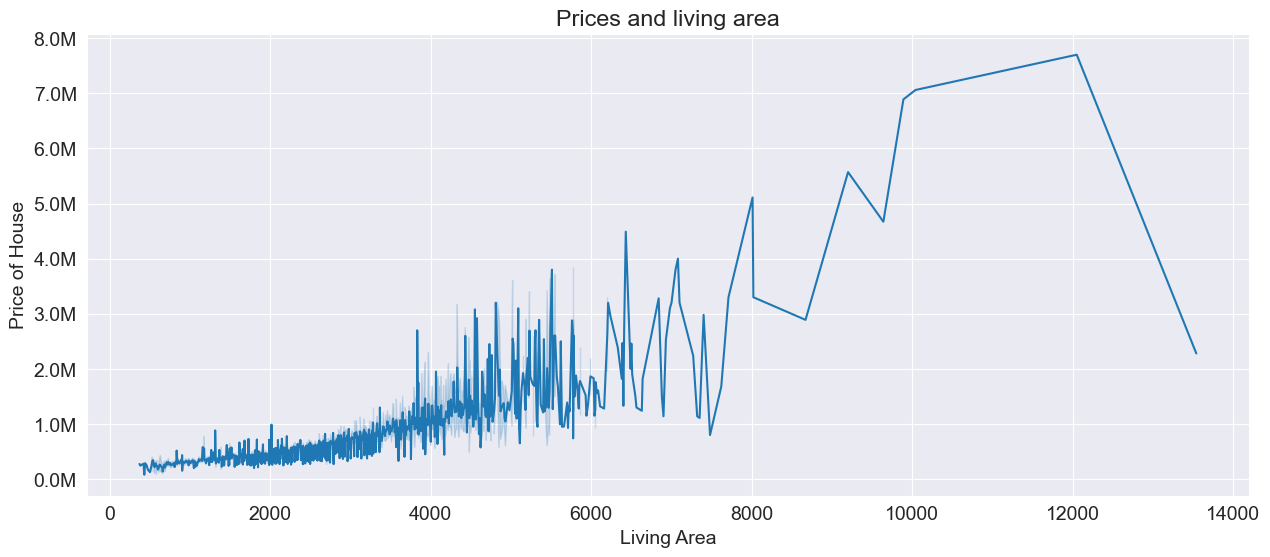

In [68]:
sns.lineplot(data=data,
             x='living_area',
             y='price')

def millions(x, pos):
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Prices and living area')
plt.xlabel('Living Area')
plt.ylabel('Price of House')
plt.show()

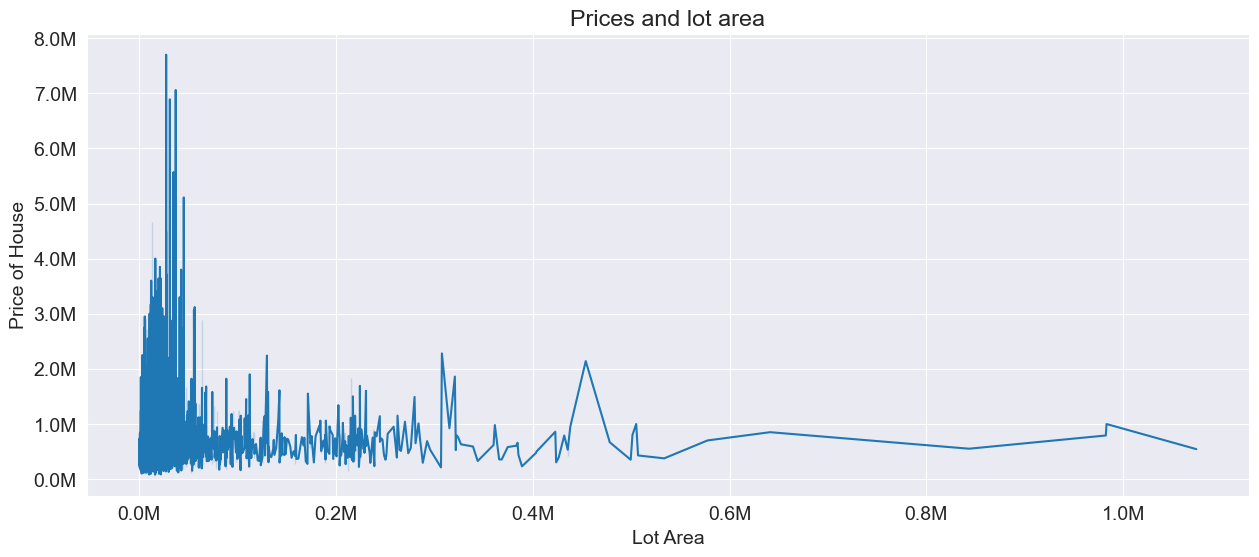

In [91]:
sns.lineplot(data=data,
             x='lot_area',
             y='price')

def millions(x, pos):
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Prices and lot area')
plt.xlabel('Lot Area')
plt.ylabel('Price of House')
plt.show()

The relationship between above 2 graphs seems inverse, so we will consider both these while making predicitons

Now we will check the price with area of the hosue(excluding basement) and area of the basement

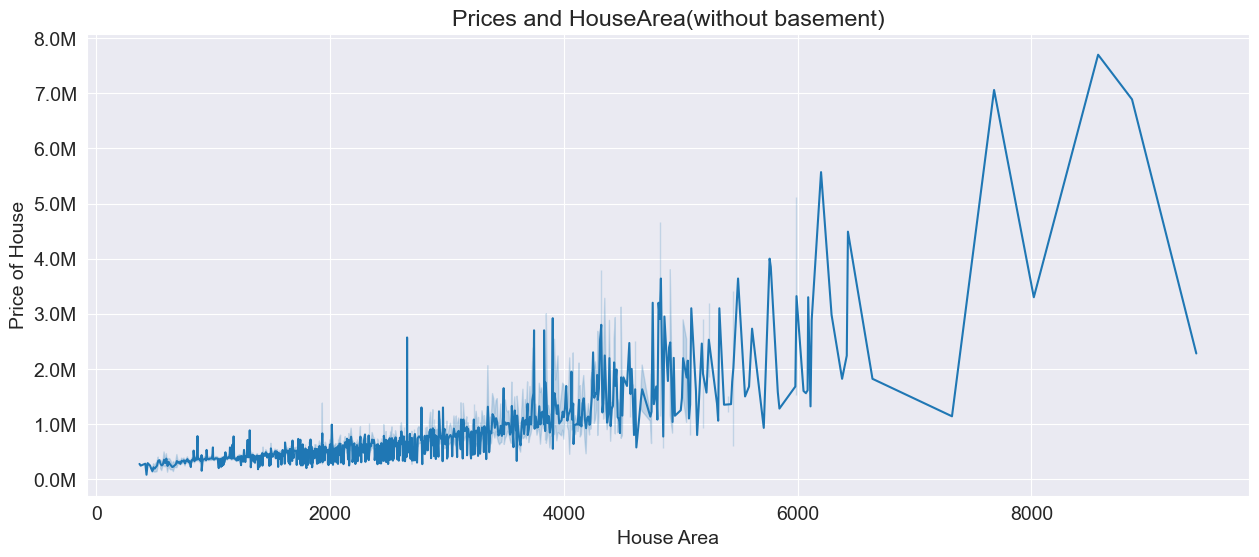

In [92]:
sns.lineplot(data=data,
             x='area_of_the_house(excluding_basement)',
             y='price')

def millions(x, pos):
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Prices and HouseArea(without basement)')
plt.xlabel('House Area')
plt.ylabel('Price of House')
plt.show()

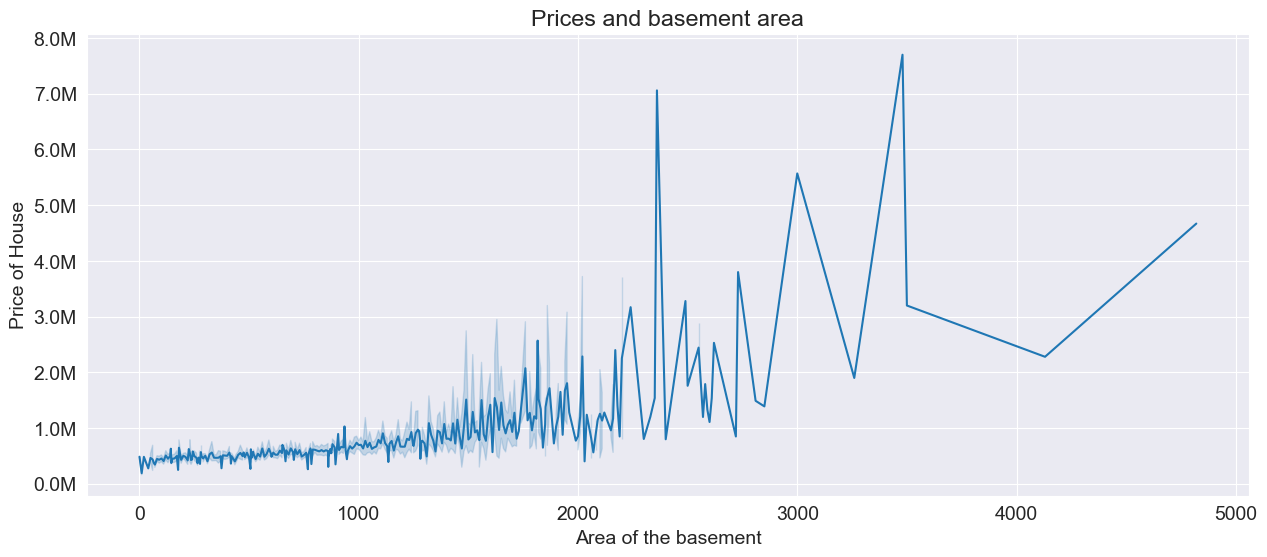

In [93]:
sns.lineplot(data=data,
             x='area_of_the_basement',
             y='price')

def millions(x, pos):
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Prices and basement area')
plt.xlabel('Area of the basement')
plt.ylabel('Price of House')
plt.show()

Lets add another column total_area which will be the sum of area of the house(excluding basement) and area of the basement and insert it at second last position and visualize it

In [94]:
data.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'total_area',
       'price'],
      dtype='object')

In [95]:
total_area = data.pop('total_area')
data.insert(len(data.columns) - 1, 'total_area',total_area)

In [96]:
data.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'postal_code', 'lattitude',
       'longitude', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'total_area',
       'price'],
      dtype='object')

In [97]:
data

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,area_of_the_house(excluding_basement),...,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,total_area,price
0,5,2,3650,9050,2,0,4,5,10,3370,...,0,122003,52.86,-114.56,2880,5400,2,58,3650,2380000
1,4,2,2920,4000,1,0,0,5,8,1910,...,0,122004,52.89,-114.47,2470,4000,2,51,2920,1400000
2,5,2,2910,9480,1,0,0,3,8,2910,...,0,122004,52.89,-114.47,2940,6600,1,53,2910,1200000
3,4,2,3310,42998,2,0,0,3,9,3310,...,0,122005,52.95,-114.32,3350,42847,3,76,3310,838000
4,3,2,2710,4500,1,0,0,4,8,1880,...,0,122006,52.90,-114.48,2060,4500,1,51,2710,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1,1556,20000,1,0,0,4,7,1556,...,0,122066,52.62,-114.47,2250,17286,3,76,1556,221700
14616,3,2,1680,7000,1,0,0,4,7,1680,...,0,122072,52.51,-114.39,1540,7480,3,59,1680,219200
14617,2,1,1070,6120,1,0,0,3,6,1070,...,0,122056,52.73,-114.51,1130,6120,2,64,1070,209000
14618,4,1,1030,6621,1,0,0,4,6,1030,...,0,122042,52.72,-114.41,1420,6631,3,54,1030,205000


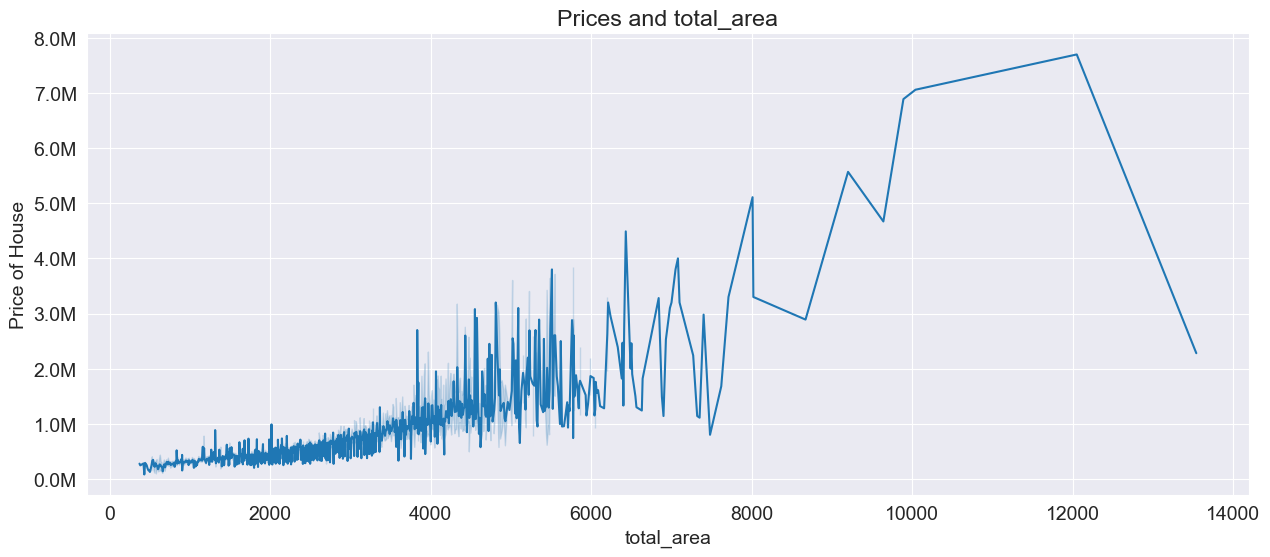

In [99]:
sns.lineplot(data=data,
             x='total_area',
             y='price')

def millions(x, pos):
  return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Prices and total_area')
plt.xlabel('total_area')
plt.ylabel('Price of House')
plt.show()

total_area will also be considered while making predicitons and some other factors too which are below

In [106]:
#Here we are considering below 16 columns as our input for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

inputs_selected = [
                    'number_of_bedrooms',
                    'number_of_bathrooms',
                    'living_area',
                    'lot_area',
                    'number_of_floors',
                    'grade_of_the_house',
                    'area_of_the_house(excluding_basement)',
                    'area_of_the_basement',
                    'built_year',
                    'postal_code',
                    'lattitude',
                    'longitude',
                    'living_area_renov',
                    'lot_area_renov',
                    'distance_from_the_airport',
                    'total_area'
                  ]

In [124]:
inputs = data[inputs_selected]
targets = data['price']

In [125]:
inputs_train, inputs_test, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
lr_model = LinearRegression()
lr_model.fit(inputs_train, target_train)

LinearRegression()

In [127]:
lr_predictions = lr_model.predict(inputs_test)

Below are root mean square error and r-squared error

In [128]:
lr_rmse_initial = mean_squared_error(target_test, lr_predictions)
lr_r2_initial = r2_score(target_test, lr_predictions)

In [129]:
print("Initial Linear Regression MSE:", lr_rmse_initial)
print("Initial Linear Regression R² score:", lr_r2_initial)

Initial Linear Regression MSE: 45731796726.90615
Initial Linear Regression R² score: 0.6754744722439094
